# 09 Time Series
__Math 3080: Fundamentals of Data Science__

Reading:
* McKinney, Chapter 11 Time Series

Outline:
* Datetime objects
* Conversion from Datetime to string
* Using Datetime as index

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

## Datetime objects

### Making a timestamp

In [2]:
datetime.now()

datetime.datetime(2023, 3, 28, 10, 14, 40, 661638)

In [3]:
now = datetime.now()
print(now.year, now.month, now.day)
print(now.hour, now.minute, now.second)

2023 3 28
10 14 40


In [4]:
timestamp = datetime(2018, 5, 5)
timestamp

datetime.datetime(2018, 5, 5, 0, 0)

In [35]:
# Get just the date
datetime.now().date()

datetime.date(2023, 3, 28)

In [52]:
# Get just the time
datetime.now().time()

datetime.time(15, 39, 3, 979562)

### Timezones

In [53]:
# Timezone
import pytz # Python Timezone

#pytz.common_timezones  # This will list all the available timezones

tz = pytz.timezone('UTC')  # aka Greenwich Mean Time, or Zulu Time

datetime.now(tz)

datetime.datetime(2023, 3, 28, 21, 39, 12, 963501, tzinfo=<UTC>)

In [55]:
datetime.now(pytz.timezone('Europe/Berlin'))

datetime.datetime(2023, 3, 28, 23, 41, 8, 533065, tzinfo=<DstTzInfo 'Europe/Berlin' CEST+2:00:00 DST>)

### Changes in time

In [5]:
datetime(2023, 3, 25) - datetime(2022, 9, 12)

datetime.timedelta(days=194)

In [6]:
datetime(2023, 3, 25, 12, 0, 0) - datetime(2023, 1, 12, 16, 5, 23)

datetime.timedelta(days=71, seconds=71677)

In [7]:
delta = datetime(2023, 3, 25, 12, 0, 0) - datetime(2023, 1, 12, 16, 5, 23)

print(delta.days, delta.seconds)

71 71677


In [8]:
from datetime import timedelta
datetime.now() - timedelta(20)

datetime.datetime(2023, 3, 8, 10, 14, 41, 580518)

In [9]:
datetime.now() - 2*delta

datetime.datetime(2022, 11, 4, 18, 25, 27, 776902)

### Date Ranges

In [28]:
#pd.date_range(datetime(2012, 4, 1), datetime(2012, 6, 1)
pd.date_range("2012-04-01","2012-06-01")

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [56]:
pd.date_range( datetime.now() - timedelta(90) , datetime.now() )

DatetimeIndex(['2022-12-28 15:41:20.340560', '2022-12-29 15:41:20.340560',
               '2022-12-30 15:41:20.340560', '2022-12-31 15:41:20.340560',
               '2023-01-01 15:41:20.340560', '2023-01-02 15:41:20.340560',
               '2023-01-03 15:41:20.340560', '2023-01-04 15:41:20.340560',
               '2023-01-05 15:41:20.340560', '2023-01-06 15:41:20.340560',
               '2023-01-07 15:41:20.340560', '2023-01-08 15:41:20.340560',
               '2023-01-09 15:41:20.340560', '2023-01-10 15:41:20.340560',
               '2023-01-11 15:41:20.340560', '2023-01-12 15:41:20.340560',
               '2023-01-13 15:41:20.340560', '2023-01-14 15:41:20.340560',
               '2023-01-15 15:41:20.340560', '2023-01-16 15:41:20.340560',
               '2023-01-17 15:41:20.340560', '2023-01-18 15:41:20.340560',
               '2023-01-19 15:41:20.340560', '2023-01-20 15:41:20.340560',
               '2023-01-21 15:41:20.340560', '2023-01-22 15:41:20.340560',
               '2023-01-2

In [34]:
pd.date_range( datetime.now().date() - timedelta(90) , datetime.now().date() )

DatetimeIndex(['2022-12-28', '2022-12-29', '2022-12-30', '2022-12-31',
               '2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
               '2023-01-13', '2023-01-14', '2023-01-15', '2023-01-16',
               '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
               '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24',
               '2023-01-25', '2023-01-26', '2023-01-27', '2023-01-28',
               '2023-01-29', '2023-01-30', '2023-01-31', '2023-02-01',
               '2023-02-02', '2023-02-03', '2023-02-04', '2023-02-05',
               '2023-02-06', '2023-02-07', '2023-02-08', '2023-02-09',
               '2023-02-10', '2023-02-11', '2023-02-12', '2023-02-13',
               '2023-02-14', '2023-02-15', '2023-02-16', '2023-02-17',
               '2023-02-18', '2023-02-19', '2023-02-20', '2023-02-21',
      

## Conversion between Datetime and string formats
When loading data, most timestamps are in a string format. We can go back and forth between datetime and string formats easily enough. To do this, we use time formatting options.
* Look at tables 11.2 and 11.3 in McKinney's Textbook for formatting codes

In [10]:
# datetime to string
str(timestamp)

'2018-05-05 00:00:00'

In [11]:
datetime.now().strftime("%w : %d %m %y")

'2 : 28 03 23'

In [12]:
weekday = {'0': "Sunday", '1': "Monday", '2': "Tuesday", '3': "Wednesday",
           '4': "Thursday", '5': "Friday", '6': "Saturday"}

months = {'01': "Jan", '02': "Feb", '03': "Mar", '04': "Apr",
          '05': "May", '06': "Jun", '07': "Jul", '08': "Aug",
          '09': "Sep", '10': "Oct", '11': "Nov", '12': "Dec"}

In [13]:
timestamp = datetime.now()

print("Today is",weekday[timestamp.strftime("%w")], ", ",
      timestamp.strftime("%d"), months[timestamp.strftime("%m")],
      timestamp.strftime("%Y"), ". Good morning.")

Today is Tuesday ,  28 Mar 2023 . Good morning.


In [14]:
# string to datetime
the_date = "May 24, 2012"

datetime.strptime(the_date, "%b %d, %Y")

datetime.datetime(2012, 5, 24, 0, 0)

When dealing with multiple dates in a series, *pandas* makes this very simple using the `pd.to_datetime` method.

In [15]:
dates = ["2022-04-02","2022-04-03","2022-04-04",
         "2022-04-05","2022-04-06","2022-04-07"]

pd.to_datetime(dates)

DatetimeIndex(['2022-04-02', '2022-04-03', '2022-04-04', '2022-04-05',
               '2022-04-06', '2022-04-07'],
              dtype='datetime64[ns]', freq=None)

## Time Series Basics
Now that we have a way to work with timestamps, we can use an array of timestamps in our data analysis.

In [16]:
timeseries = pd.Series(np.random.standard_normal(6), index=dates)
timeseries

2022-04-02    0.139492
2022-04-03    2.272823
2022-04-04   -0.093660
2022-04-05   -1.300673
2022-04-06   -1.986962
2022-04-07   -0.481844
dtype: float64

<AxesSubplot: >

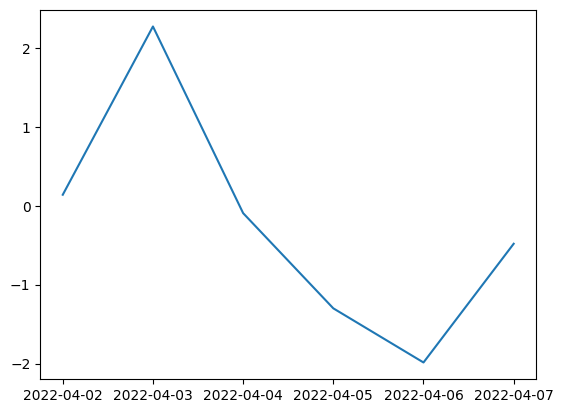

In [17]:
sns.lineplot(timeseries)

In [18]:
timeseries.index[0]

'2022-04-02'

In [19]:
timeseries["2022-04-05"]

-1.3006728821798874

In [20]:
pd.date_range("2023-01-01", periods=365)

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10',
               ...
               '2023-12-22', '2023-12-23', '2023-12-24', '2023-12-25',
               '2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29',
               '2023-12-30', '2023-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

In [21]:
long_ts = pd.Series(np.random.standard_normal(1000),
                   index=pd.date_range("2000-01-01", periods=1000))
long_ts

2000-01-01    0.329990
2000-01-02    1.000144
2000-01-03   -0.782262
2000-01-04   -0.018105
2000-01-05   -0.225856
                ...   
2002-09-22   -0.332165
2002-09-23    1.111426
2002-09-24   -0.700181
2002-09-25    0.005137
2002-09-26   -0.514535
Freq: D, Length: 1000, dtype: float64

<AxesSubplot: >

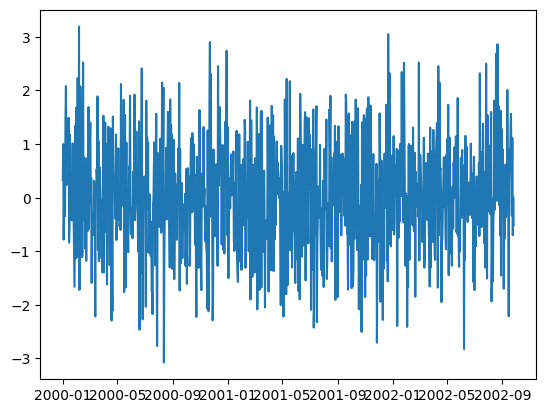

In [22]:
sns.lineplot(long_ts)

<AxesSubplot: >

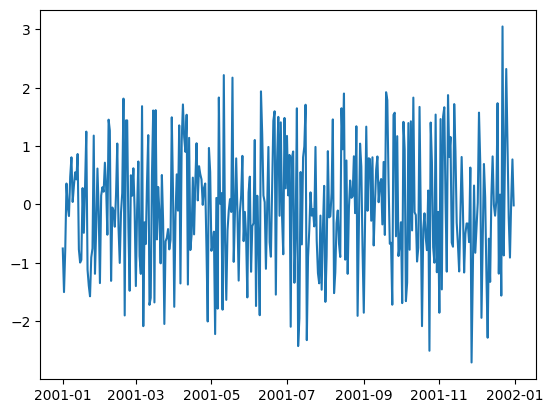

In [23]:
sns.lineplot(long_ts["2001"])

<AxesSubplot: >

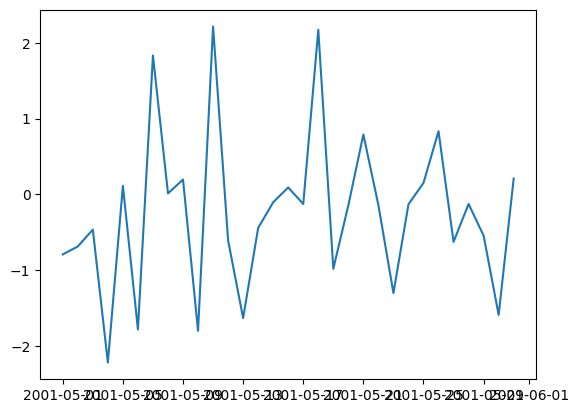

In [24]:
sns.lineplot(long_ts["2001-05"])

<AxesSubplot: >

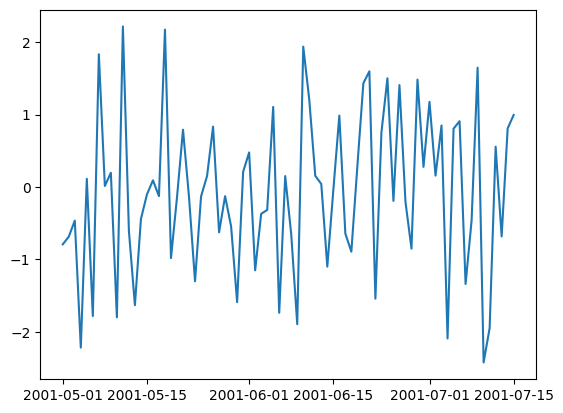

In [25]:
sns.lineplot(long_ts[datetime(2001,5,1):datetime(2001,7,15)])

<AxesSubplot: >

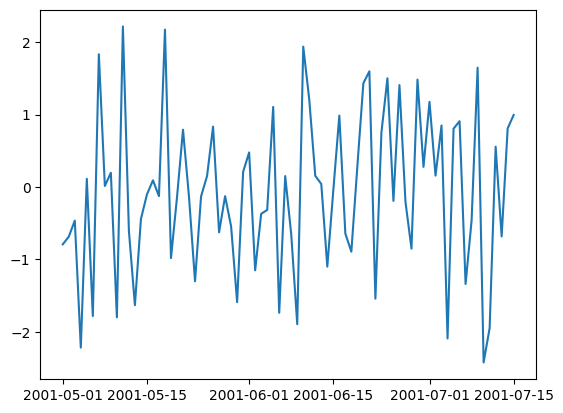

In [26]:
sns.lineplot(long_ts["2001-05-01":"2001-07-15"])

In [27]:
long_ts.truncate(after="2000-12-01")

2000-01-01    0.329990
2000-01-02    1.000144
2000-01-03   -0.782262
2000-01-04   -0.018105
2000-01-05   -0.225856
                ...   
2000-11-27   -0.278887
2000-11-28   -2.288477
2000-11-29   -1.864084
2000-11-30    0.899420
2000-12-01   -0.255476
Freq: D, Length: 336, dtype: float64